In [1]:
import os, numpy as np, matplotlib.pyplot as plt, pickle, pandas as pd
from tqdm import tqdm
import torch
from utils import *

## Visualizing Loss Curves for AWS training.

In [2]:
path = '/home/anirudhkailaje/Documents/01_UPenn/01_ESE5460/03_Project/src/99_ModelLogs/SeqlenComp/'
losses = []
loss_names = []
for file in os.listdir(path):
    if 'loss' in file:
        try:
            with open(path+file, 'rb') as f:
                losses.append(pickle.load(f))
            loss_names.append(file.split('.')[0])
        except:
            continue

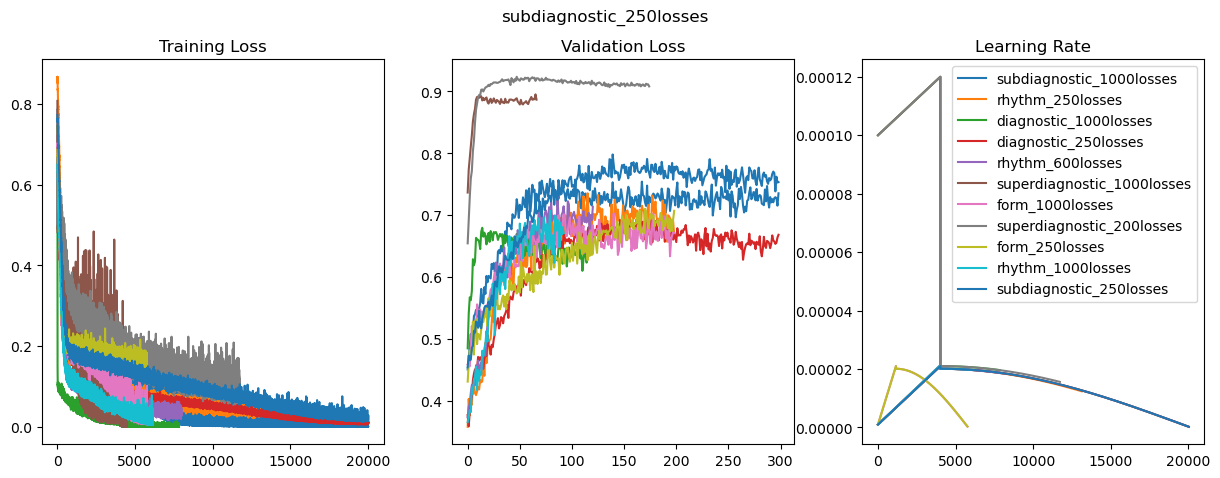

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(len(losses)):
    
    axes[0].plot(losses[i][0], label = loss_names[i])
    axes[0].set_title('Training Loss')
    axes[1].plot(torch.tensor(losses[i][1]).cpu().numpy(), label = loss_names[i])
    axes[1].set_title('Validation Loss')
    axes[2].plot(losses[i][2], label = loss_names[i])
    axes[2].set_title('Learning Rate')
    fig.suptitle(loss_names[i])
plt.legend()
plt.show()

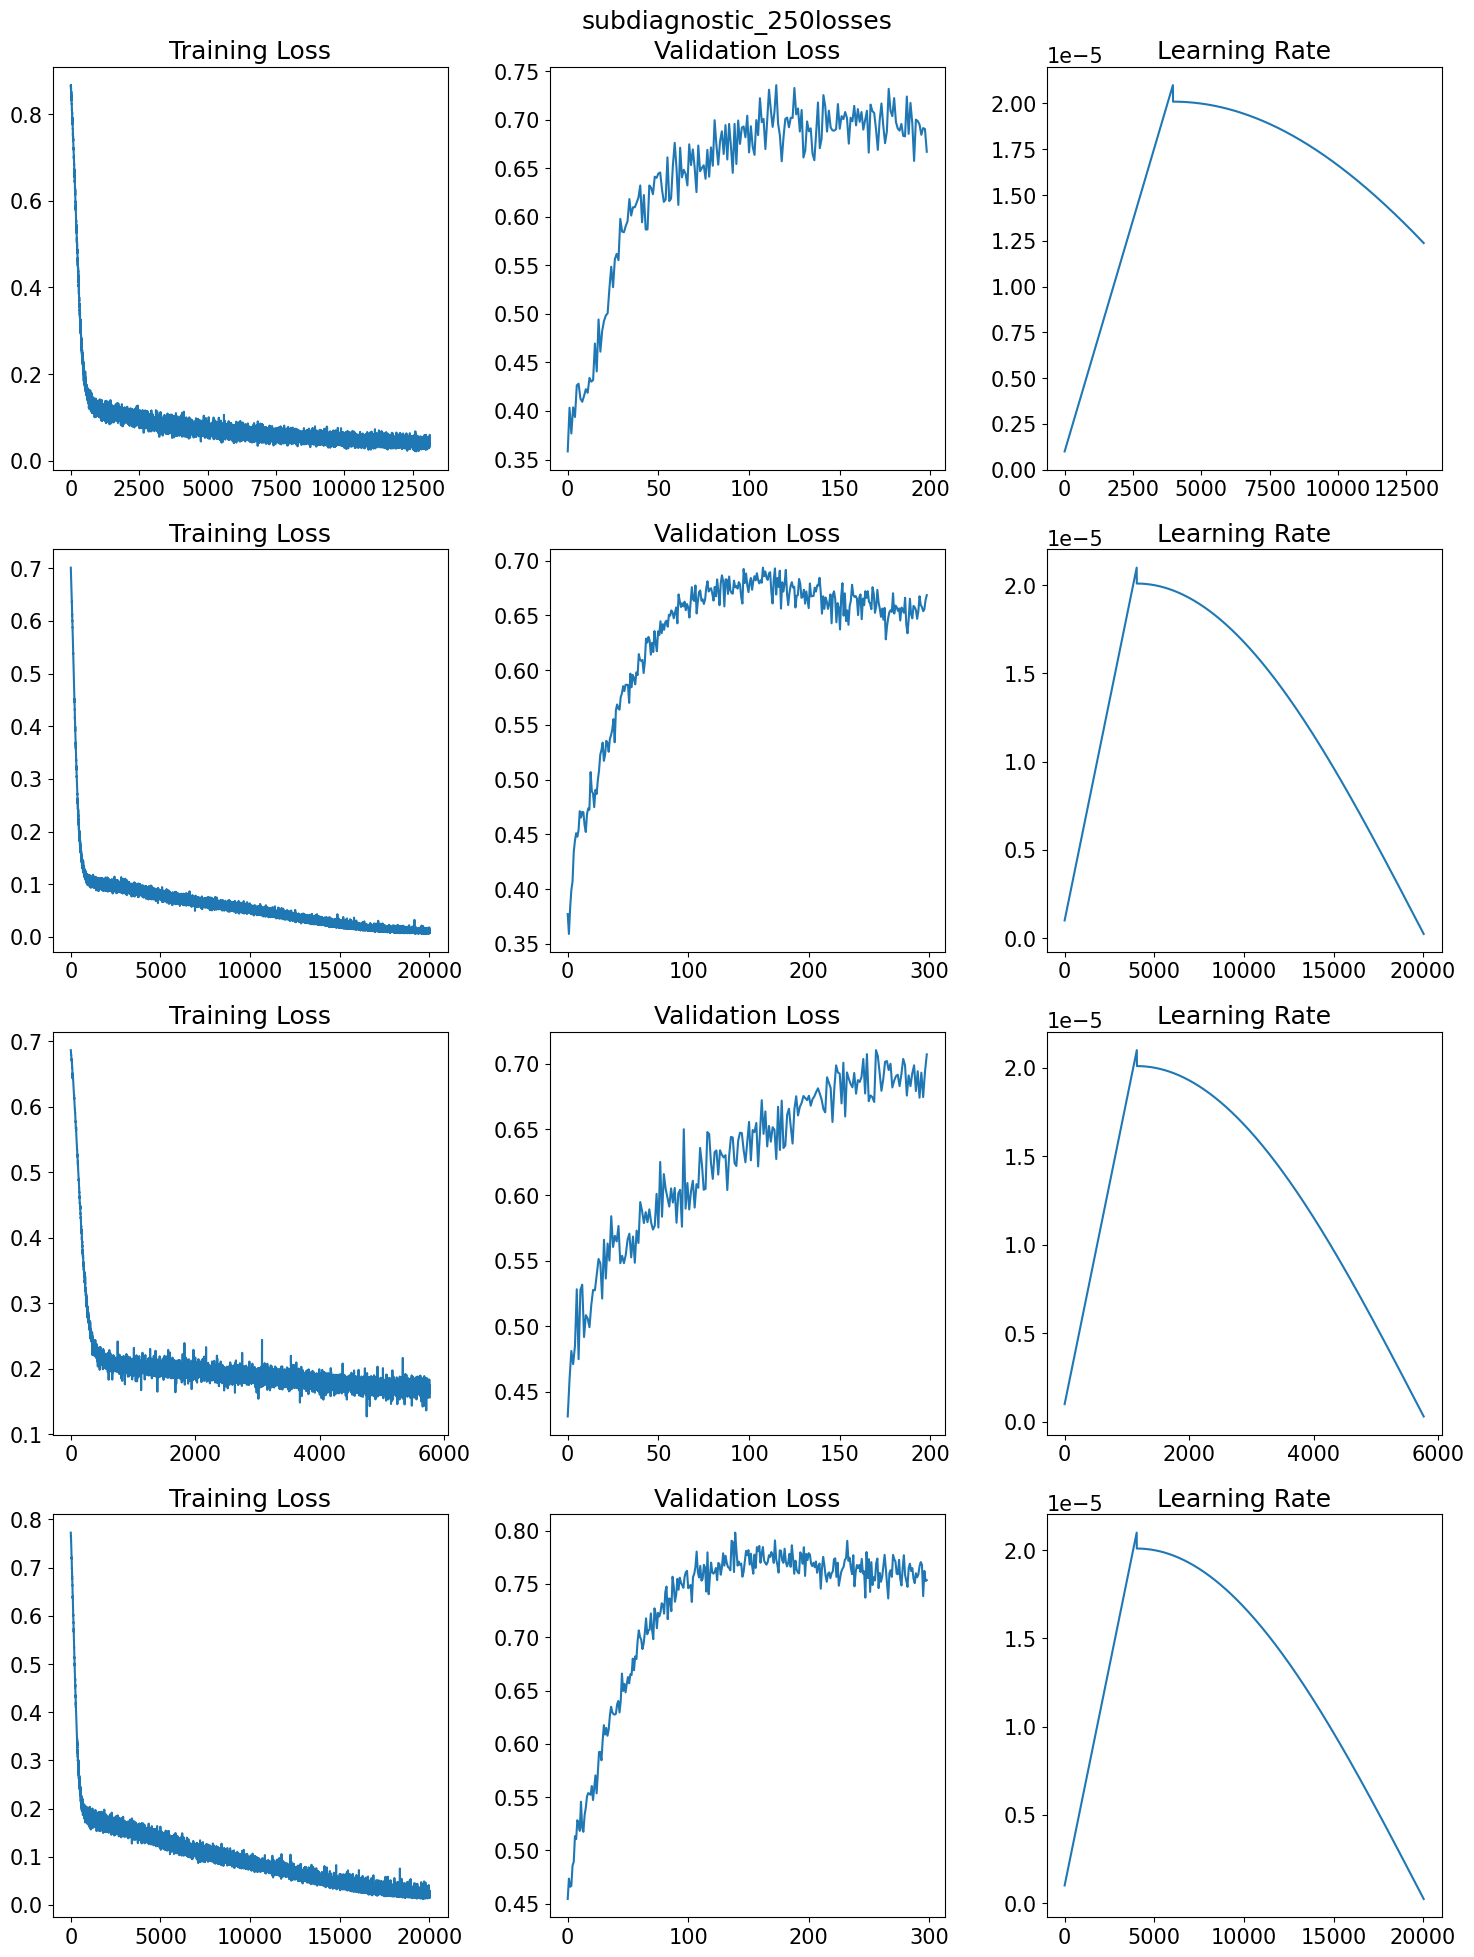

In [42]:
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
subplot_idx = 0
for i in range(len(losses)):
    if '250' in loss_names[i]:
        row_idx = subplot_idx // 3
        col_idx = subplot_idx % 3
        axes[row_idx, col_idx].plot(losses[i][0], label=loss_names[i])
        axes[row_idx, col_idx].set_title('Training Loss')
        axes[row_idx, col_idx+1].plot(torch.tensor(losses[i][1]).cpu().numpy(), label=loss_names[i])
        axes[row_idx, col_idx+1].set_title('Validation Loss')
        axes[row_idx, col_idx+2].plot(losses[i][2], label=loss_names[i])
        axes[row_idx, col_idx+2].set_title('Learning Rate')
        fig.suptitle(loss_names[i])
        subplot_idx += 3
plt.tight_layout()
plt.savefig('Training.png')
plt.show()

In [4]:
loss_names_copy = loss_names.copy()
losses_copy = losses.copy()

loss_names_copy = sorted(loss_names_copy, key=lambda x: (x.split('_')[0]))
losses_copy = [losses_copy[loss_names.index(name)] for name in loss_names_copy]

loss_names_copy, losses_copy


(['diagnostic_1000losses',
  'diagnostic_250losses',
  'form_1000losses',
  'form_250losses',
  'rhythm_250losses',
  'rhythm_600losses',
  'rhythm_1000losses',
  'subdiagnostic_1000losses',
  'subdiagnostic_250losses',
  'superdiagnostic_1000losses',
  'superdiagnostic_200losses'],
 [([0.7456098198890686,
    0.6417034268379211,
    0.551811695098877,
    0.47356775403022766,
    0.4092864990234375,
    0.3485817611217499,
    0.3051069378852844,
    0.2628978490829468,
    0.2248377799987793,
    0.20738248527050018,
    0.18226493895053864,
    0.1688939929008484,
    0.1471301168203354,
    0.14372630417346954,
    0.13049821555614471,
    0.1321161985397339,
    0.1182931661605835,
    0.12076122313737869,
    0.11924998462200165,
    0.11984147131443024,
    0.11675423383712769,
    0.10743530839681625,
    0.1081896498799324,
    0.10370278358459473,
    0.10049308836460114,
    0.11018573492765427,
    0.106601782143116,
    0.10064689069986343,
    0.10819725692272186,
    0.1

In [5]:
aucs = [torch.tensor(loss[1][-20:]).cpu().numpy() for loss in losses_copy]
aucs

[array([0.6479105 , 0.6292475 , 0.6332511 , 0.6450663 , 0.6365108 ,
        0.646624  , 0.635654  , 0.6394592 , 0.6327397 , 0.6542228 ,
        0.6575883 , 0.6300792 , 0.6394857 , 0.61026454, 0.62843114,
        0.64174163, 0.63638765, 0.62350065, 0.63587964, 0.6367634 ],
       dtype=float32),
 array([0.65230393, 0.6660355 , 0.6417031 , 0.633607  , 0.64665586,
        0.66516423, 0.65074235, 0.6472254 , 0.658609  , 0.65737426,
        0.65472525, 0.64680856, 0.65365964, 0.66744345, 0.6594789 ,
        0.65750533, 0.65376073, 0.6555617 , 0.6640776 , 0.6684049 ],
       dtype=float32),
 array([0.66623336, 0.6607234 , 0.6734346 , 0.65870243, 0.6610015 ,
        0.6802534 , 0.68918693, 0.66323733, 0.67670774, 0.6987618 ,
        0.6896678 , 0.6626424 , 0.67402923, 0.6573611 , 0.68337643,
        0.6337386 , 0.6593672 , 0.6673962 , 0.6727459 , 0.67159057],
       dtype=float32),
 array([0.68194604, 0.6870065 , 0.69061494, 0.69166476, 0.68297935,
        0.6920255 , 0.7037417 , 0.69893396, 

In [6]:
loss_names_copy

['diagnostic_1000losses',
 'diagnostic_250losses',
 'form_1000losses',
 'form_250losses',
 'rhythm_250losses',
 'rhythm_600losses',
 'rhythm_1000losses',
 'subdiagnostic_1000losses',
 'subdiagnostic_250losses',
 'superdiagnostic_1000losses',
 'superdiagnostic_200losses']

In [7]:
aucs_last_20s = [[aucs[0], aucs[1]], [aucs[2], aucs[3]], [aucs[4], aucs[5], aucs[6]], [aucs[7], aucs[8]], [aucs[9], aucs[10]]]

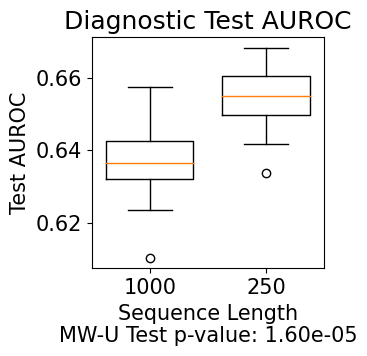

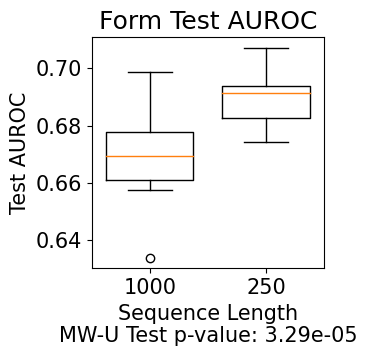

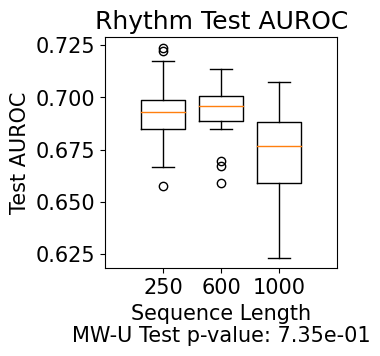

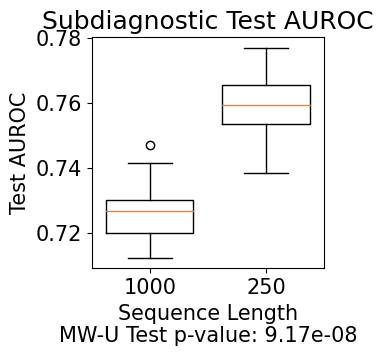

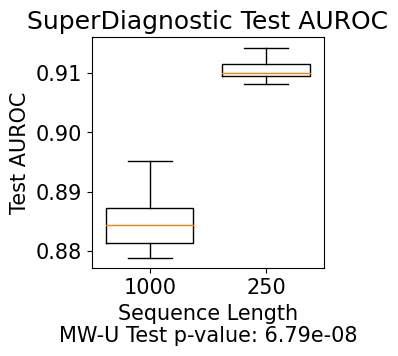

In [11]:
# Add annotation for p-value
from scipy.stats import mannwhitneyu
label_names = [['1000', '250'], ['1000', '250'], ['250', '600', '1000'], ['1000', '250'], ['1000', '250']]
titles = ['Diagnostic', 'Form', 'Rhythm', 'Subdiagnostic', 'SuperDiagnostic']
for i in range(len(aucs_last_20s)):
    aucs_last_20 = aucs_last_20s[i]
    fig, ax = plt.subplots(figsize=(3,3))
    plt.rcParams.update({'font.size': 15})  # Set the font size to 15 pt
    widths = [0.15]*len(aucs_last_20)  # Set the widths of the boxes
    if len(aucs_last_20) == 3:
        positions = [1, 1.1, 1.2]
        widths = [0.075]*len(aucs_last_20)
    else:
        positions = [1, 1.2]  # Set the positions of the boxes
        widths = [0.15]*len(aucs_last_20)
    ax.boxplot(aucs_last_20, labels=label_names[i], positions= positions, widths=widths)
    ax.set_ylabel('Test AUROC')
    # Calculate the p-value for the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(aucs_last_20[0], aucs_last_20[1], alternative='two-sided')
    ax.set_xlabel('Sequence Length')
    # Add annotation for p-value below x-axis
    ax.text(0.5, -0.25, f'MW-U Test p-value: {p_value:.2e}', transform=ax.transAxes, ha='center', va='top')
    ax.set_xlim(0.9, 1.3)
    plt.title(f'{titles[i]} Test AUROC')
    plt.savefig(f'../report/{titles[i]}_test_auroc.png', dpi=300, bbox_inches='tight')
    plt.show()


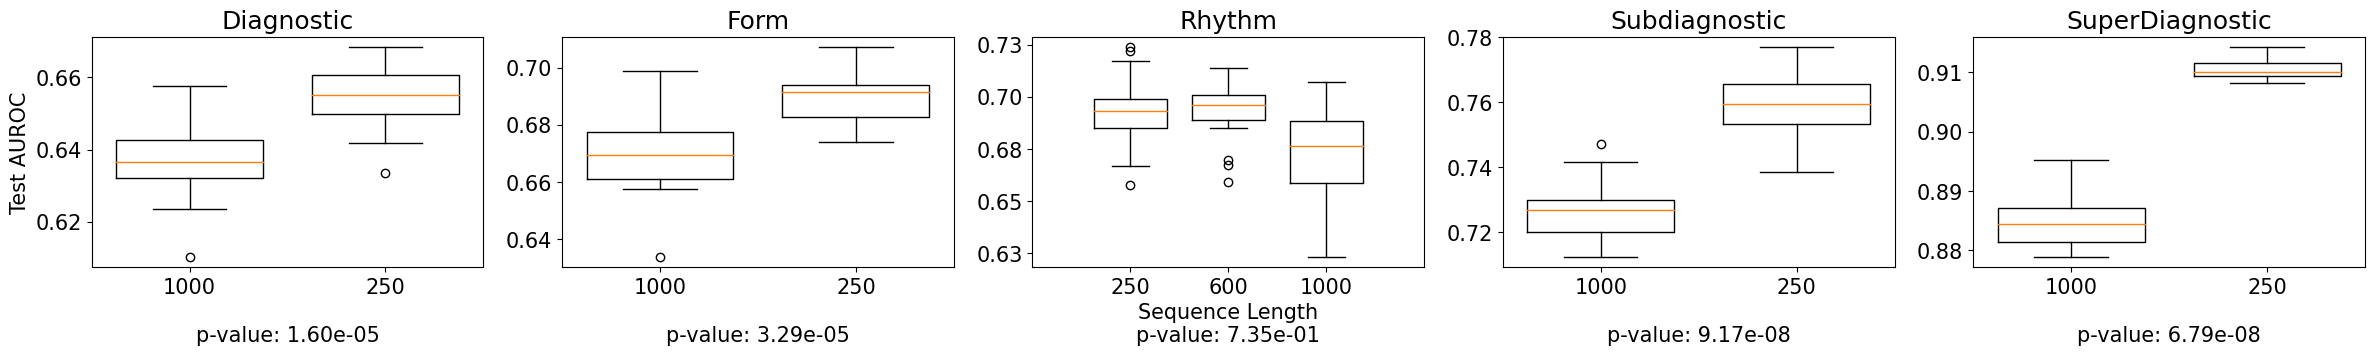

In [35]:
import matplotlib.ticker as mticker

fig, axes = plt.subplots(1, 5, figsize=(24, 4))

for i in range(len(aucs_last_20s)):
    aucs_last_20 = aucs_last_20s[i]
    ax = axes[i]
    widths = [0.15]*len(aucs_last_20)  # Set the widths of the boxes
    if len(aucs_last_20) == 3:
        positions = [1, 1.1, 1.2]
        widths = [0.075]*len(aucs_last_20)
    else:
        positions = [1, 1.2]  # Set the positions of the boxes
        widths = [0.15]*len(aucs_last_20)
    ax.boxplot(aucs_last_20, labels=label_names[i], positions=positions, widths=widths)
    if i == 0:
        ax.set_ylabel('Test AUROC')
    # Calculate the p-value for the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(aucs_last_20[0], aucs_last_20[1], alternative='two-sided')
    if i == 2:
        ax.set_xlabel('Sequence Length')
    # Add annotation for p-value below x-axis
    ax.text(0.5, -0.25, f'p-value: {p_value:.2e}', transform=ax.transAxes, ha='center', va='top')
    ax.set_xlim(0.9, 1.3)
    ax.set_title(titles[i])
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))  # Format y-axis ticks
plt.tight_layout()
plt.savefig('../report/test_auroc.png', dpi=300, bbox_inches='tight')
plt.show()


In [31]:

array1 = aucs_last_95[0]
array2 = aucs_last_95[1]

statistic, p_value = mannwhitneyu(array1, array2, alternative='two-sided')
print('p-value: ', p_value)

p-value:  1.5697308240965883e-05


In [32]:
from scipy.stats import ttest_ind

statistic, p_value = ttest_ind(array1, array2)
print('p-value:', p_value)


p-value: 7.042865251037898e-07


In [36]:
from scipy.stats import normaltest

_, p_value1 = normaltest(array1)
_, p_value2 = normaltest(array2)

probability1 = 1 - p_value1
probability2 = 1 - p_value2

print('Probability that array1 comes from a Gaussian distribution:', probability1)
print('Probability that array2 comes from a Gaussian distribution:', probability2)


Probability that array1 comes from a Gaussian distribution: 0.5729133664003205
Probability that array2 comes from a Gaussian distribution: 0.21450188529022451


/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


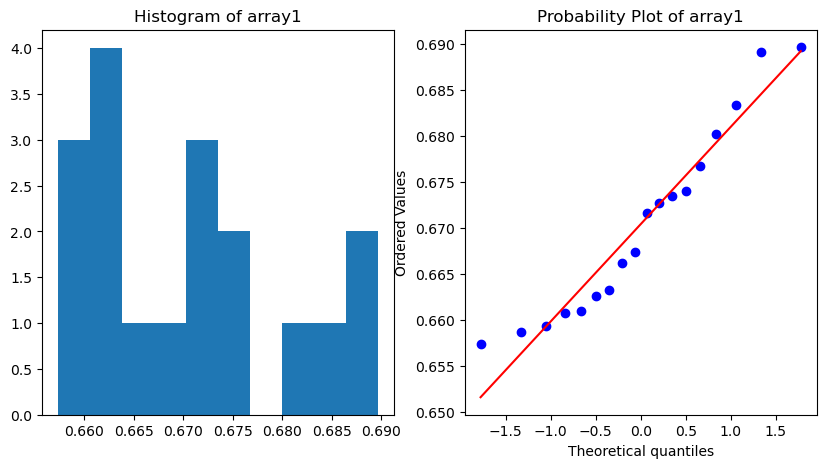

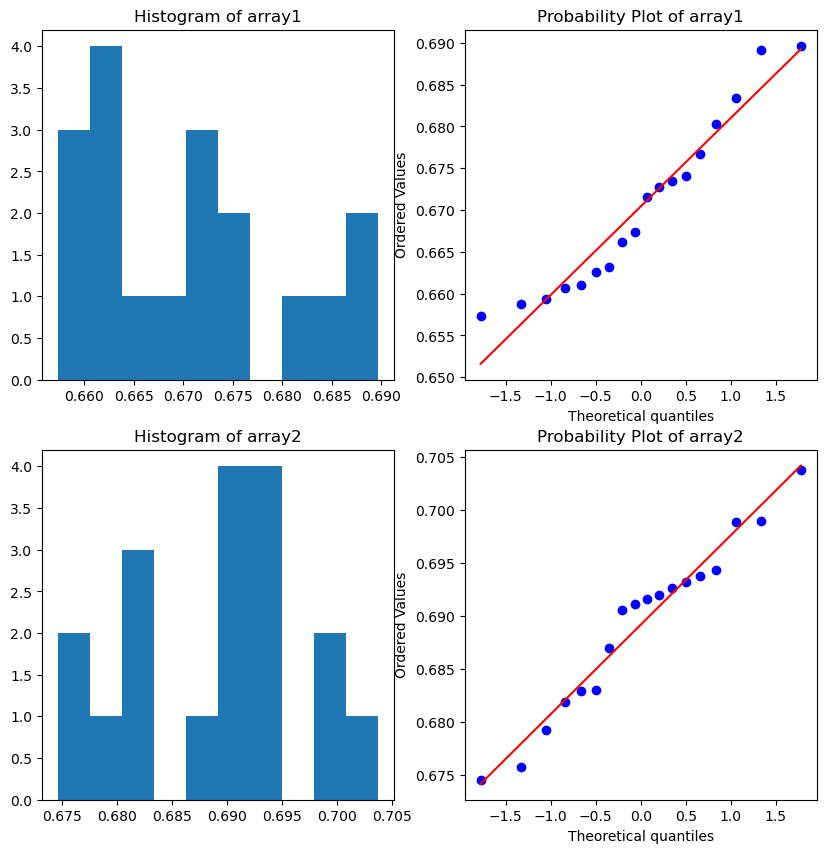

In [35]:
from scipy import stats
from scipy import stats
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(array1, bins=10)
axes[0].set_title('Histogram of array1')

# Plot the probability plot for array1
stats.probplot(array1, plot=axes[1])
axes[1].set_title('Probability Plot of array1')
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot histogram and probability plot for array1
axes[0, 0].hist(array1, bins=10)
axes[0, 0].set_title('Histogram of array1')
stats.probplot(array1, plot=axes[0, 1])
axes[0, 1].set_title('Probability Plot of array1')

# Plot histogram and probability plot for array2
axes[1, 0].hist(array2, bins=10)
axes[1, 0].set_title('Histogram of array2')
stats.probplot(array2, plot=axes[1, 1])
axes[1, 1].set_title('Probability Plot of array2')

plt.show()

plt.show()


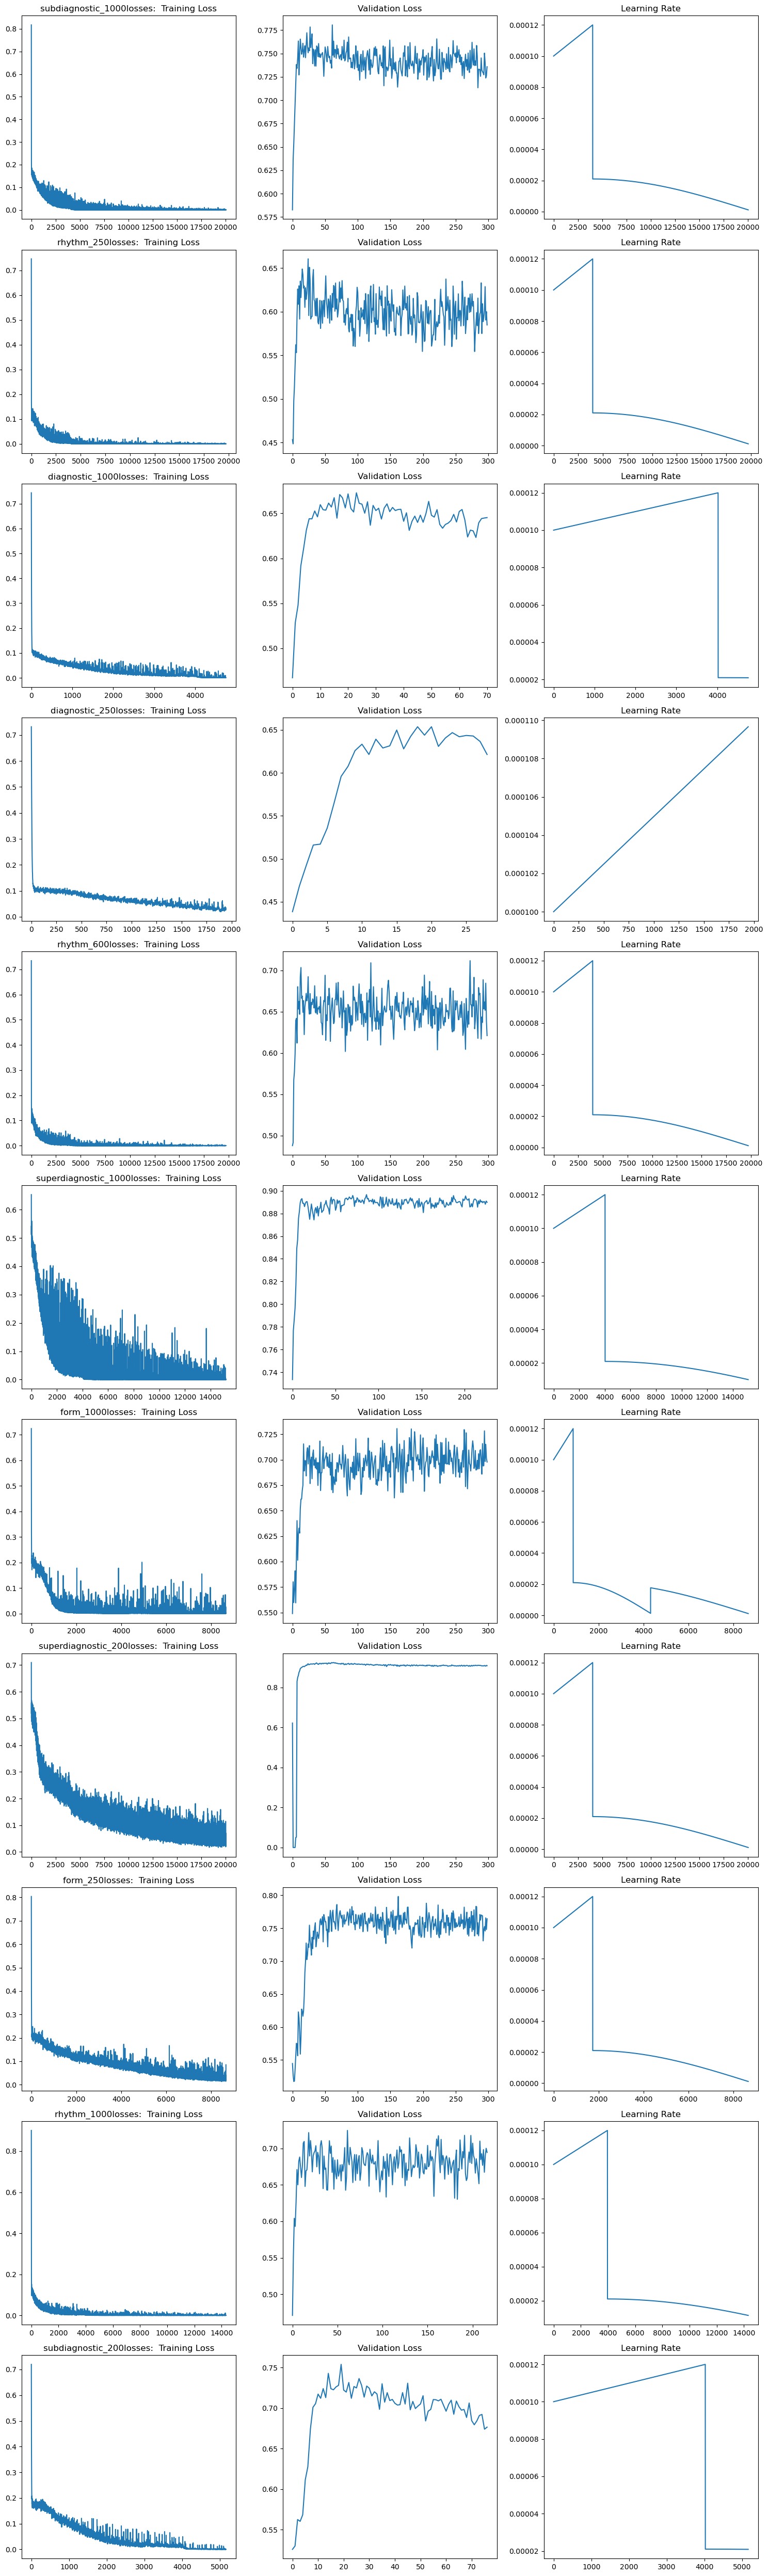

In [9]:
fig, axes = plt.subplots(11, 3, figsize=(15, 50))
for i in range(len(losses)):
    axes[i, 0].plot(losses[i][0])
    axes[i, 0].set_title(f'{loss_names[i]}:  Training Loss')
    axes[i, 1].plot(torch.tensor(losses[i][1]).cpu().numpy())
    axes[i, 1].set_title('Validation Loss')
    axes[i, 2].plot(losses[i][2])
    axes[i, 2].set_title('Learning Rate')
    # fig.suptitle(loss_names[i])
plt.tight_layout()
plt.savefig('PTBlosses.png')
plt.show()

## Data Loading from Utils

In [3]:
data_folder = '/home/anirudhkailaje/Documents/01_UPenn/01_ESE5460/03_Project/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/'
data, raw_labels = load_dataset(data_folder, 100)

In [4]:
tasks = ['diagnostic', 'subdiagnostic', 'superdiagnostic', 'form', 'rhythm']
task_labels = []
for task in tasks:
    task_labels.append(compute_label_aggregations(raw_labels, folder= data_folder, ctype=task))

In [6]:
outputfolder = '/home/anirudhkailaje/Documents/01_UPenn/01_ESE5460/03_Project/src/data/01_12-12-2023/'
experiment_name = 'Plain'
if not os.path.exists(outputfolder+experiment_name):
            os.makedirs(outputfolder+experiment_name)
            if not os.path.exists(outputfolder+experiment_name+'/results/'):
                os.makedirs(outputfolder+experiment_name+'/results/')
            if not os.path.exists(outputfolder+experiment_name+'/models/'):
                os.makedirs(outputfolder+experiment_name+'/models/')
            if not os.path.exists(outputfolder+experiment_name+'/data/'):
                os.makedirs(outputfolder+experiment_name+'/data/')

In [17]:
for task_idx in range(5):
    task_data, labels, Y, mlb = select_data(data, task_labels[task_idx], tasks[task_idx], 0, outputfolder+experiment_name+'/data/')
    print(f'{tasks[task_idx]}: ', Y.shape, )#mlb.classes_)
    del task_data, labels, Y, mlb

diagnostic:  (21430, 44)
subdiagnostic:  (21430, 23)
superdiagnostic:  (21430, 5)
form:  (8988, 19)
rhythm:  (21066, 12)


In [16]:
data.shape

(21837, 1000, 12)

In [13]:
task_idx = 4


task_data, labels, Y, mlb = select_data(data, task_labels[task_idx], tasks[task_idx], 0, outputfolder+experiment_name+'/data/')
# test_fold = 10; val_fold = 9; train_fold = 8
# X_test = task_data[labels.strat_fold == test_fold]
# y_test = Y[labels.strat_fold == test_fold]
# # 9th fold for validation (8th for now)
# X_val = task_data[labels.strat_fold == val_fold]
# y_val = Y[labels.strat_fold == val_fold]
# # rest for training
# X_train = task_data[labels.strat_fold <= train_fold]
# y_train = Y[labels.strat_fold <= train_fold]

# np.savez_compressed(f'./{tasks[task_idx]}Train.npz', X_train=X_train, y_train=y_train)
# np.savez_compressed(f'./{tasks[task_idx]}Val.npz', X_val=X_val, y_val=y_val)
# np.savez_compressed(f'./{tasks[task_idx]}Test.npz', X_test=X_test, y_test=y_test)

In [14]:
mlb.classes_

array(['AFIB', 'AFLT', 'BIGU', 'PACE', 'PSVT', 'SARRH', 'SBRAD', 'SR',
       'STACH', 'SVARR', 'SVTAC', 'TRIGU'], dtype=object)

In [12]:
labels.shape

(21066, 38)

In [ ]:
fig = plt.figure(figsize=(20, 10))
plt.hist(y_train.ravel(), bins=100)
plt.show()

## Learning Rate Finder Logs

In [ ]:
with open('./form_1000lr_max.pickle', 'rb') as f:
    lrs, train_loss = pickle.load(f)

In [ ]:
%matplotlib widget
fig = plt.figure(figsize=(20, 10))
plt.plot(lrs, train_loss)
plt.show()

In [ ]:
os.path.exists('./form_1000lr_max.pickle')

In [2]:
def convert_tb_data(root_dir, sort_by=None):
    """Convert local TensorBoard data into Pandas DataFrame.
    
    Function takes the root directory path and recursively parses
    all events data.    
    If the `sort_by` value is provided then it will use that column
    to sort values; typically `wall_time` or `step`.
    
    *Note* that the whole data is converted into a DataFrame.
    Depending on the data size this might take a while. If it takes
    too long then narrow it to some sub-directories.
    
    Paramters:
        root_dir: (str) path to root dir with tensorboard data.
        sort_by: (optional str) column name to sort by.
    
    Returns:
        pandas.DataFrame with [wall_time, name, step, value] columns.
    
    """
    import os
    import pandas as pd
    from tensorflow.python.summary.summary_iterator import summary_iterator

    def convert_tfevent(filepath):
        return pd.DataFrame([
            parse_tfevent(e) for e in summary_iterator(filepath) if len(e.summary.value)
        ])

    def parse_tfevent(tfevent):
        return dict(
            wall_time=tfevent.wall_time,
            name=tfevent.summary.value[0].tag,
            step=tfevent.step,
            value=float(tfevent.summary.value[0].simple_value),
        )
    
    columns_order = ['wall_time', 'name', 'step', 'value']
    
    out = []
    for (root, _, filenames) in os.walk(root_dir):
        for filename in filenames:
            if "events.out.tfevents" not in filename:
                continue
            file_full_path = os.path.join(root, filename)
            out.append(convert_tfevent(file_full_path))

    # Concatenate (and sort) all partial individual dataframes
    all_df = pd.concat(out)[columns_order]
    if sort_by is not None:
        all_df = all_df.sort_values(sort_by)
        
    return all_df.reset_index(drop=True)



In [3]:
dir_path = "/home/anirudhkailaje/Documents/01_UPenn/01_ESE5460/03_Project/src/runs/"
exp_name = "Nov30_13-23-06_debian"
tec = "Dec03_21-29-00_debian"
Resnetdf = convert_tb_data(f"{dir_path}/{exp_name}")
Transformerdf = convert_tb_data(f"{dir_path}/{tec}")

2023-12-17 18:09:21.823798: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-17 18:09:22.007075: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 18:09:22.007143: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 18:09:22.031850: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-17 18:09:22.089905: I tensorflow/core/platform/cpu_feature_guar

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [4]:
Resnetdf

,wall_time,name,step,value
0,1.701369e+09,Train_Loss,1,0.742634
1,1.701369e+09,Learning rate,1,0.000100
2,1.701369e+09,Batch Train AUC,1,0.437547
3,1.701369e+09,Train_Loss,2,0.662075
4,1.701369e+09,Learning rate,2,0.000122
...,...,...,...,...
9215,1.701370e+09,Batch Train AUC,3069,0.938854
9216,1.701370e+09,Train_Loss,3070,0.175931
9217,1.701370e+09,Learning rate,3070,0.000010
9218,1.701370e+09,Batch Train AUC,3070,0.976921


In [5]:
Transformerdf[Transformerdf['name'] == 'Test AUC'].value.to_numpy()

array([0.70798516, 0.77388483, 0.76441032, 0.77095121, 0.80166692,
       0.77778161, 0.80012226, 0.81606525, 0.81295598, 0.78993118])

In [6]:
Resnetdf[Resnetdf['name'] == 'Test AUC'].value.to_numpy()

array([0.78668523, 0.78493601, 0.82266337, 0.82694703, 0.79890466,
       0.80450886, 0.84463346, 0.84663862, 0.84311378, 0.8702516 ])

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

aucs = [Resnetdf[Resnetdf['name'] == 'Test AUC'].value.to_numpy()[-6:], Transformerdf[Transformerdf['name'] == 'Test AUC'].value.to_numpy()[-6:]]

fig, ax = plt.subplots()
ax.boxplot(aucs, labels=['Resnet', 'Transformer'], positions=[1, 1.2], widths=[0.15, 0.15])
ax.set_xlabel('Model')
ax.set_ylabel('AUC')
ax.set_xlim(0.9, 1.3)

# # Add annotations of the mean value
# mean_values = [np.mean(auc) for auc in aucs]
# for i, mean_value in enumerate(mean_values):
#     ax.annotate(f"Mean: {mean_value:.2f}", xy=(i+1, mean_value), xytext=(0, 10), textcoords='offset points', ha='center', va='bottom')

# Calculate the p-value for the Mann-Whitney U test
statistic, p_value = mannwhitneyu(aucs[0], aucs[1], alternative='two-sided')

# Annotate the p-value below the x-label
ax.text(0.5, -0.15, f"Mann Whitney U Test p-value: {p_value:.2e}", transform=ax.transAxes, ha='center', va='top')
ax.title.set_text('Test AUC for Resnet and Transformer')
plt.savefig('ResnetvsTransformer.png', dpi=300, bbox_inches='tight')
plt.show()


<Figure size 640x480 with 0 Axes>

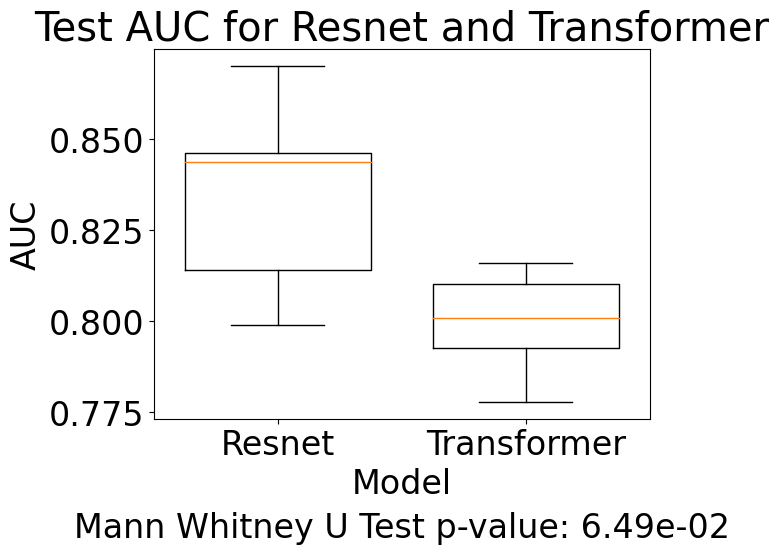

In [12]:
import matplotlib.pyplot as plt

# Increase the font size
plt.rcParams.update({'font.size': 24})

aucs = [Resnetdf[Resnetdf['name'] == 'Test AUC'].value.to_numpy()[-6:], Transformerdf[Transformerdf['name'] == 'Test AUC'].value.to_numpy()[-6:]]

fig, ax = plt.subplots()
ax.boxplot(aucs, labels=['Resnet', 'Transformer'], positions=[1, 1.2], widths=[0.15, 0.15])
ax.set_xlabel('Model')
ax.set_ylabel('AUC')
ax.set_xlim(0.9, 1.3)

# Calculate the p-value for the Mann-Whitney U test
statistic, p_value = mannwhitneyu(aucs[0], aucs[1], alternative='two-sided')

# Annotate the p-value below the x-label
ax.text(0.5, -0.25, f"Mann Whitney U Test p-value: {p_value:.2e}", transform=ax.transAxes, ha='center', va='top')
ax.title.set_text('Test AUC for Resnet and Transformer')
plt.savefig('ResnetvsTransformer.png', dpi=300, bbox_inches='tight')
plt.show()


In [13]:
aucs[1].mean()

0.7997538646062216